In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt

In [3]:
path = r"/home/waves/projects/smap-drydown/data/Bassiouni_etal_2020/piep_global_results_bassiouni.nc"
dataset = nc.Dataset(path, 'r')

# Open the NetCDF4 file
with nc.Dataset(path, 'r') as dataset:
    # Display global attributes
    print("Global Attributes:")
    for attr_name in dataset.ncattrs():
        print(f"{attr_name}: {getattr(dataset, attr_name)}")

    # Display dimensions
    print("\nDimensions:")
    for dim_name, dim_obj in dataset.dimensions.items():
        print(f"{dim_name}: {len(dim_obj)}")

    # Display variables and their attributes
    print("\nVariables:")
    for var_name, var_obj in dataset.variables.items():
        print(f"{var_name}:")
        for attr_name in var_obj.ncattrs():
            print(f"  {attr_name}: {getattr(var_obj, attr_name)}")
        print(f"  Shape: {var_obj.shape}")
        # Optionally, print a preview of the variable's data (e.g., first few elements)
        print(f"  Data Preview: {var_obj[:]}")

Global Attributes:
description: input parameters and results associated with analysis in "Plant Water Uptake Thresholds Inferred from Satellite Soil Moisture" (Bassiouni et al., in preparation)
author: Maoya Bassiouni
title: Global Dataset of Ecohydrological Parameters
contact: maoya.bassiouni@slu.se
grid: 36 km Equal-Area Scalable Earth Grid, Version 2.0 (EASE-Grid 2.0) in a global cylindrical projection
date: 2020
methods: for methods and references to original datasets used see "Plant Water Uptake Thresholds Inferred from Satellite Soil Moisture" (Bassiouni et al., in preparation)

Dimensions:
y: 406
x: 964

Variables:
y:
  Shape: (406,)
  Data Preview: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  8

In [4]:
import xarray as xr

In [5]:
xda = xr.open_dataset(path)
xda

<xarray.Dataset> Size: 152MB
Dimensions:          (y: 406, x: 964)
Coordinates:
  * y                (y) int64 3kB 0 1 2 3 4 5 6 ... 399 400 401 402 403 404 405
  * x                (x) int64 8kB 0 1 2 3 4 5 6 ... 957 958 959 960 961 962 963
Data variables: (12/53)
    Ks               (y, x) float64 3MB ...
    b                (y, x) float64 3MB ...
    f_max            (y, x) float64 3MB ...
    f_max_grd        (y, x) float64 3MB ...
    f_max_std        (y, x) float64 3MB ...
    f_w              (y, x) float64 3MB ...
    ...               ...
    norm_wu          (y, x) float64 3MB ...
    norm_wu_rc       (y, x) float64 3MB ...
    max_s_v          (y, x) float64 3MB ...
    min_s_v          (y, x) float64 3MB ...
    mean_s_v         (y, x) float64 3MB ...
    std_s_v          (y, x) float64 3MB ...
Attributes:
    description:  input parameters and results associated with analysis in "P...
    author:       Maoya Bassiouni
    title:        Global Dataset of Ecohydrological Parameters
    contact:      maoya.bassiouni@slu.se
    grid:         36 km Equal-Area Scalable Earth Grid, Version 2.0 (EASE-Gri...
    date:         2020
    methods:      for methods and references to original datasets used see "P...

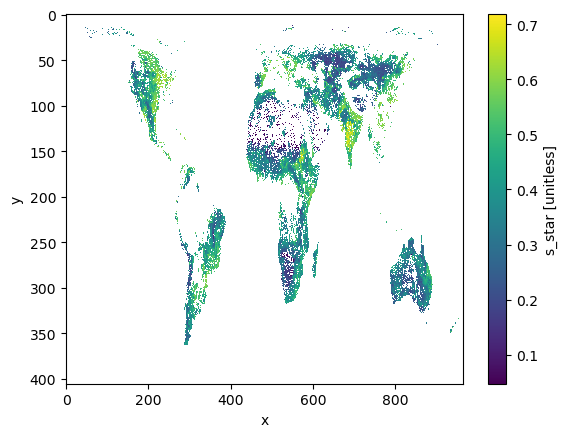

In [6]:
xda = xda.set_coords(["longitude", "latitude"])
map_s_star = xda.s_star.plot()

plt.gca().invert_yaxis()
plt.show()

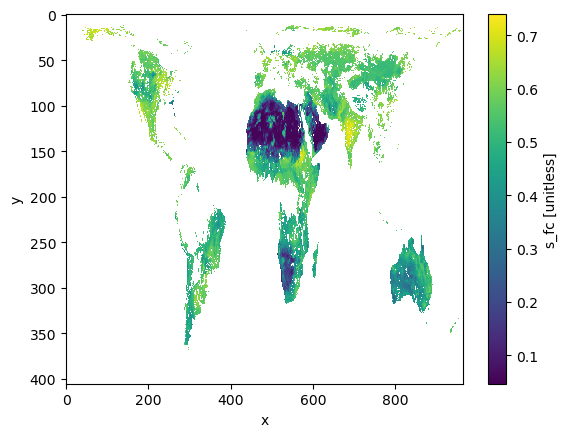

In [7]:
map_s_fc = xda.s_fc.plot()

plt.gca().invert_yaxis()
plt.show()

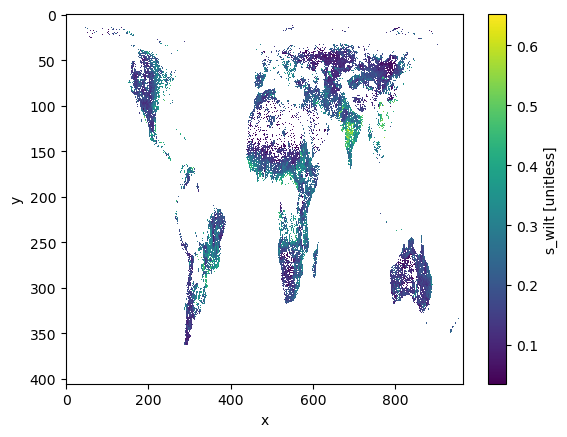

In [8]:
map_s_wilt = xda.s_wilt.plot()

plt.gca().invert_yaxis()
plt.show()

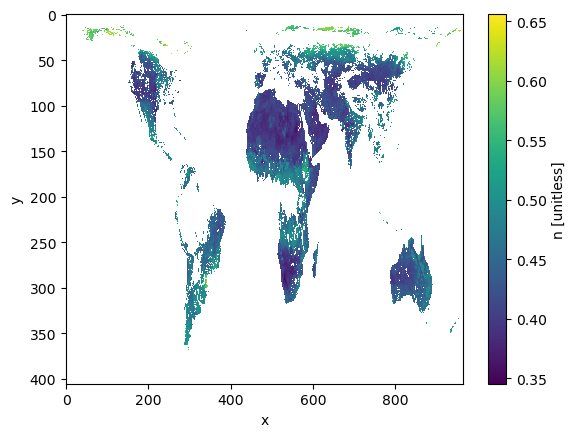

In [9]:
map_n = xda.n.plot()

plt.gca().invert_yaxis()
plt.show()

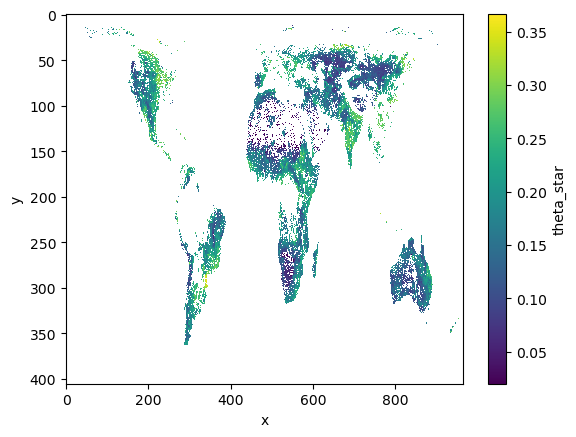

In [10]:
xda["theta_star"] = xda.n * xda.s_star
xda.theta_star.plot()
plt.gca().invert_yaxis()
plt.show()

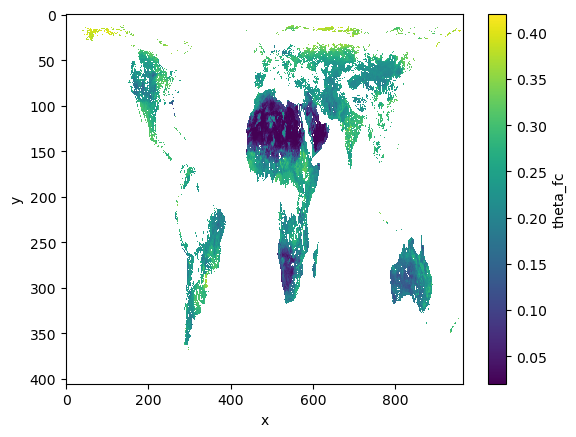

In [11]:
xda["theta_fc"] = xda.n * xda.s_fc
xda.theta_fc.plot()
plt.gca().invert_yaxis()
plt.show()

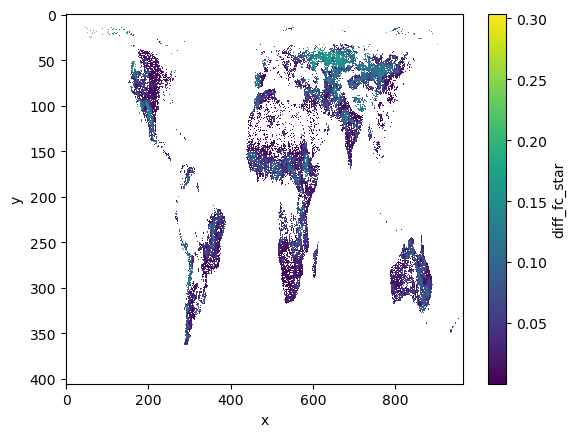

In [12]:
xda["diff_fc_star"] = xda.theta_fc - xda.theta_star
xda.diff_fc_star.plot()
plt.gca().invert_yaxis()
plt.show()

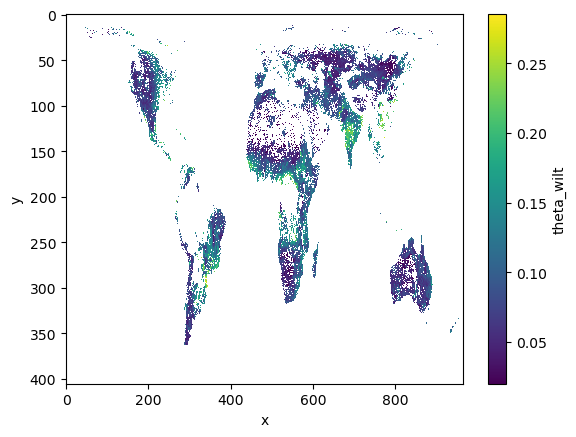

In [13]:
xda["theta_wilt"] = xda.n * xda.s_wilt
xda.theta_wilt.plot()
plt.gca().invert_yaxis()
plt.show()

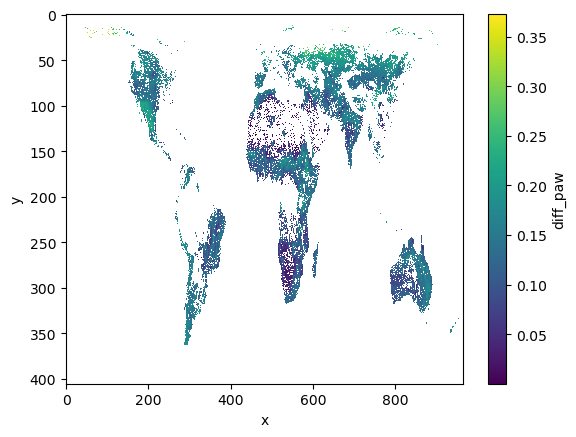

In [14]:
xda["diff_paw"] = xda.theta_fc- xda.theta_wilt
xda.diff_paw.plot()
plt.gca().invert_yaxis()
plt.show()

In [16]:
_df = xda[['longitude', 'latitude', 'theta_fc', 'theta_wilt', 'theta_star', 'n']].to_dataframe()
df = _df.reset_index().rename(columns={'y': 'EASE_row_index', 'x': 'EASE_column_index'})
df.head()

,EASE_row_index,EASE_column_index,longitude,latitude,theta_fc,theta_wilt,theta_star,n
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
out_file = f"/home/waves/projects/smap-drydown/data/datarods/anc_info_Bassiouni.csv"
df.to_csv(out_file)

In [23]:
df[(df["EASE_row_index"]==37)&(df["EASE_column_index"]==577)]

,EASE_row_index,EASE_column_index,longitude,latitude,theta_fc,theta_wilt,theta_star,n
36245,37,577,35.663902,54.432781,0.356109,0.098537,0.240138,0.545801
